In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
%matplotlib inline

In [3]:
import networkx as nx

# Load Data

In [4]:
fb_edges_files = open('/home/hok/installing/fastsc/Dataset/facebookG.txt', 'r')

fb_edges_reader = csv.reader(fb_edges_files, delimiter=' ')
edges = [(int(node1), int(node2)) for node1, node2 in fb_edges_reader]
fb_edges_files.close()

# Network Visualization

In [5]:
graph = nx.Graph()

In [6]:
graph.add_edges_from(edges)

/usr/local/Anaconda/envs/py3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


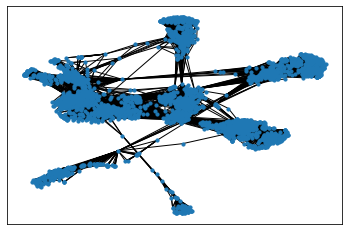

In [7]:
nx.draw_networkx(graph, node_size=10, with_labels=False)

# Loading Clusters

In [8]:
cluster_file = open('/data/hok/testdata/fastsc/facebook_k7_output.txt', 'r')

cluster_reader = csv.reader(cluster_file, delimiter=' ')
clusters = {int(line[0]): int(line[1]) for i, line in enumerate(cluster_reader) if i>0}
cluster_file.close()

In [9]:
from collections import defaultdict

cluster_members = defaultdict(lambda : [])
for node, cluster in clusters.items():
    cluster_members[cluster] += [node]
    
cluster_members = dict(cluster_members)

In [10]:
color_map = {i: c for i, c in enumerate(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])}

In [11]:
graph_nodes_positions = nx.spring_layout(graph)

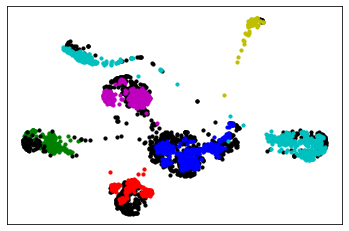

In [12]:
for cluster in cluster_members:
    nx.draw_networkx_nodes(graph, 
                           graph_nodes_positions, 
                           nodelist=cluster_members[cluster],
                           node_color=color_map[cluster],
                           node_size=10)